## Setup the environment

#### Adding the source code path

In [2]:
import sys  
sys.path.insert(1, './../../ESN-IP/IP/.')

In [3]:
import random

random.seed(10)

In [4]:
from DATA import MC_UNIFORM 
import numpy as np
import matplotlib.pyplot as plt

 ## Checking the Random Timeseries Generation 

Samples are randomly sampled from a uniform distribution, by defaut between [-0.5, 0.5], but such bound can be redefined. 
The resulting timeseries is then delayde by $\tau$ steps,

In [5]:
data = MC_UNIFORM()
data.delay_timeseries(10)

X = data.X_DATA
Y = data.Y_DATA

In [6]:
size = X.shape[0]
print(X.shape, Y.shape)

torch.Size([6000]) torch.Size([6000])


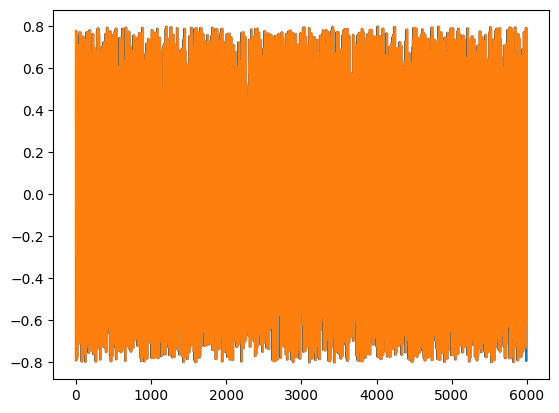

In [7]:
t = np.arange(0,size)
plt.plot(t, X, t, Y)
plt.show()

## Checking the Memory Capacity variation as the number of units changes


In [8]:
from ESN import Reservoir, EchoStateNetwork

In [9]:
def mean_mc(esn: EchoStateNetwork, rep):
    mc = 0
    for _ in range(rep):
        mc += esn.MemoryCapacity()

    return mc/rep

In [10]:
esn_5 = EchoStateNetwork(Reservoir(N = 5, sparsity=0, ro_rescale=0.95))
esn_10 = EchoStateNetwork(Reservoir(N = 10, sparsity=0, ro_rescale=0.95))
esn_25 = EchoStateNetwork(Reservoir(N = 25, sparsity=0, ro_rescale=0.95))
esn_50 = EchoStateNetwork(Reservoir(N = 50, sparsity=0, ro_rescale=0.95))

In [11]:
mean_mc(esn_5, 1)

TypeError: mean() received an invalid combination of arguments - got (axis=NoneType, dtype=NoneType, out=NoneType, ), but expected one of:
 * (*, torch.dtype dtype)
 * (tuple of ints dim, bool keepdim, *, torch.dtype dtype)
 * (tuple of names dim, bool keepdim, *, torch.dtype dtype)


In [ ]:
mean_mc(esn_10, 1)

tensor(-460.8589)

In [ ]:
mean_mc(esn_25, 1)

tensor(-455.8013)

In [ ]:
import torch

In [ ]:
reservoir_units = 50
max_delay = 2 * reservoir_units
    
# initialise reservoir here
model = EchoStateNetwork(Reservoir(N = reservoir_units, sparsity=0, ro_rescale=0.95))
   
MC = np.zeros(max_delay+1)
for k in range(1,max_delay+1): # k is the delay

    # ############# generate random uniform time series data ############### #
    length = 6000
    time_series = np.random.uniform(-0.8, 0.8, length+k) 
    X_data = np.zeros(length)
    X_data = time_series[k:length+k]

    train_length = 5000
    trX = X_data[:train_length]
    input_train = trX[:train_length]
    test_length = 1000
    tsX = X_data[train_length:]
    input_test = tsX[:test_length]

    target_train = time_series[:train_length]
    target_test = time_series[train_length:-k]
    # ###################################################################### #

    # fit readout here
    train_predicted = model.train(torch.Tensor(input_train), torch.Tensor(target_train), 0, verbose=False)
        
    # predict the output here
    test_pred = model.predict(torch.Tensor(input_test)).numpy()

    # #################  MC_k calculation for the given k ################ #
    target_mean = np.mean(target_test)
    output_mean = np.mean(test_pred) 
    num, denom_t, denom_out = 0, 0, 0
    for i in range(test_length):
        deviat_t = target_test[i] - target_mean
        deviat_out = test_pred[i] - output_mean
        num += deviat_t * deviat_out
        denom_t += deviat_t**2
        denom_out += deviat_out**2
    num = num**2
    den = denom_t * denom_out
    MC[k] = num/den
    # #################################################################### #

final_MC = sum(MC)

In [ ]:
final_MC

7.462551629463332